# Exchange rate Prediction of US '$' in Indian '₹'

In [ ]:
!pip install tensorflow-gpu

In [3]:
import tensorflow as tf
tf.__version__

'2.5.0'

### In this TIME SERIES ANALYSIS problem, we will be using Deep Learning Algorithms.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [12]:
# Reading Dataset
dataset = pd.read_excel('/content/drive/MyDrive/Datasets/USD-INR_dataset.xlsx')

In [13]:
dataset.shape

(2883, 5)

In [14]:
dataset.head()

,DATE,PRICE,OPEN,HIGH,LOW
0,2021-05-10,73.450,73.302,73.490,73.273
1,2021-05-07,73.252,73.619,73.757,73.251
2,2021-05-06,73.600,73.812,74.011,73.595
3,2021-05-05,73.800,73.788,74.048,73.752
4,2021-05-04,73.760,73.868,73.978,73.765


In [15]:
#setting date column to index
ind_dataset=  dataset.set_index(["DATE"], drop=True)

In [17]:
ind_dataset.head()

,PRICE,OPEN,HIGH,LOW
DATE,,,,
2021-05-10,73.450,73.302,73.490,73.273
2021-05-07,73.252,73.619,73.757,73.251
2021-05-06,73.600,73.812,74.011,73.595
2021-05-05,73.800,73.788,74.048,73.752
2021-05-04,73.760,73.868,73.978,73.765


In [19]:
# Making the date in ascending order
df = ind_dataset.sort_index(axis=1, ascending=True)
df = df.iloc[::-1]

In [20]:
df.head()

,HIGH,LOW,OPEN,PRICE
DATE,,,,
2010-04-21,44.570,44.235,44.385,44.555
2010-04-22,44.605,44.275,44.555,44.535
2010-04-23,44.655,44.315,44.415,44.315
2010-04-26,44.430,44.145,44.285,44.395
2010-04-27,44.485,44.155,44.325,44.445


In [22]:
pr = df[["PRICE"]]

In [23]:
pr.describe()

,PRICE
count,2883.000000
mean,62.139697
std,9.029513
min,43.925000
25%,55.120000
50%,64.130000
75%,68.730000
max,76.970000


In [25]:
# Train Test Split

## training 80% of the data 

split_date = pd.Timestamp('10-05-2018')

train_data = pr.loc[:split_date]
test_data = pr.loc[split_date:]

In [26]:
# Doing Data Normalization
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()
train_data_sc = sc.fit_transform(train_data)
test_data_sc = sc.transform(test_data)

In [28]:
X_train = train_data_sc[:-1]
y_train = train_data_sc[1:]

X_test = test_data_sc[:-1]
y_test = test_data_sc[1:]

In [29]:
X_train

array([[-1.81745326],
       [-1.81996772],
       [-1.8476268 ],
       ...,
       [ 1.74931044],
       [ 1.80211413],
       [ 1.83794521]])



---



---



## Using **ANN** :
Building ANN model and fit it into the dataset for predicting.

In [30]:
# Applying RELU activation function :

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu' ))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Now, COMPILING and FITTING the model :
## using ADAM optimizer

from keras.callbacks import EarlyStopping
model.compile(loss=tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')], optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/200
2207/2207 [==============================] - 16s 1ms/step - loss: 0.0016 - rmse: 0.0366
Epoch 2/200
2207/2207 [==============================] - 2s 1ms/step - loss: 0.0025 - rmse: 0.0404
Epoch 3/200
2207/2207 [==============================] - 2s 1ms/step - loss: 0.0018 - rmse: 0.0396
Epoch 4/200
2207/2207 [==============================] - 2s 1ms/step - loss: 0.0023 - rmse: 0.0392
Epoch 5/200
2207/2207 [==============================] - 2s 1ms/step - loss: 0.0023 - rmse: 0.0389
Epoch 00005: early stopping


In [35]:
# Prediction of ANN
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from keras.layers import Dropout
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

y_pred_test = model.predict(X_test)
y_train_pred = model.predict(X_train)

train_mse = metrics.mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(train_mse)

test_mse = metrics.mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(test_mse)

print("R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("MAE on the Train set is:\t{:0.3f}".format(metrics.mean_absolute_error(y_train, y_train_pred)))

print("RMSE on the Train set is:\t{:0.3f}".format(rmse_train))

r2_train = r2_score(y_train, y_train_pred)

print("Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test)))

r2_test = r2_score(y_test, y_pred_test)

print("Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))
print("MAE on the Test set is:\t{:0.3f}".format(metrics.mean_absolute_error(y_test, y_pred_test)))
print("RMSE on the Test set is:\t{:0.3f}".format(rmse_test))

R2 score on the Train set is:	0.984
MAE on the Train set is:	0.113
RMSE on the Train set is:	0.128
Adjusted R2 score on the Train set is:	0.984

R2 score on the Test set is:	0.974
Adjusted R2 score on the Test set is:	0.974
MAE on the Test set is:	0.033
RMSE on the Test set is:	0.043


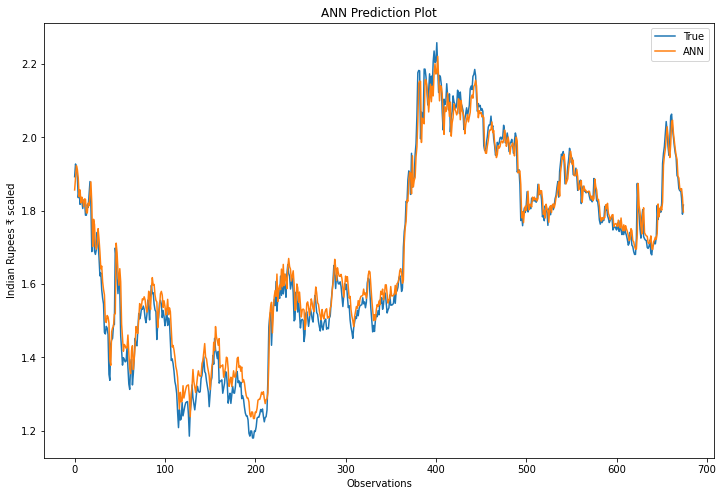

In [38]:
# Plotting for ANN prediction :

plt.figure(figsize=(12,8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test, label='ANN')
plt.title("ANN Prediction Plot")
plt.xlabel('Observations')
plt.ylabel('Indian Rupees ₹ scaled')
plt.legend()
plt.show()



---



---



## Now we will use   **LSTM_RNN**

In [39]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [41]:
from keras.layers import LSTM
import keras.backend as K

K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(1, X_train.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Now, COMPILING and FITTING the model :
## using ADAM optimizer


model_lstm.compile(loss=tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')], optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/100
2207/2207 [==============================] - 13s 2ms/step - loss: 0.3623 - rmse: 0.8205
Epoch 2/100
2207/2207 [==============================] - 4s 2ms/step - loss: 0.0069 - rmse: 0.2564
Epoch 3/100
2207/2207 [==============================] - 4s 2ms/step - loss: 0.0027 - rmse: 0.1917
Epoch 4/100
2207/2207 [==============================] - 4s 2ms/step - loss: 0.0034 - rmse: 0.1608
Epoch 5/100
2207/2207 [==============================] - 4s 2ms/step - loss: 0.0033 - rmse: 0.1419
Epoch 6/100
2207/2207 [==============================] - 4s 2ms/step - loss: 0.0031 - rmse: 0.1288
Epoch 7/100
2207/2207 [==============================] - 4s 2ms/step - loss: 0.0030 - rmse: 0.1191
Epoch 8/100
2207/2207 [==============================] - 4s 2ms/step - loss: 0.0030 - rmse: 0.1116
Epoch 00008: early stopping


In [48]:
# Prediction of LSTM :
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)

train_mse = metrics.mean_squared_error(y_train, y_train_pred_lstm)
rmse_train = np.sqrt(train_mse)

test_mse = metrics.mean_squared_error(y_test, y_pred_test_lstm)
rmse_test = np.sqrt(test_mse)

print("R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("MAE on the Train set is:\t{:0.3f}".format(metrics.mean_absolute_error(y_train, y_train_pred_lstm)))

print("RMSE on the Train set is:\t{:0.3f}".format(rmse_train))

r2_train = r2_score(y_train, y_train_pred_lstm)

print("Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))

r2_test = r2_score(y_test, y_pred_test_lstm)

print("Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))
print("MAE on the Test set is:\t{:0.3f}".format(metrics.mean_absolute_error(y_test, y_pred_test_lstm)))
print("RMSE on the Test set is:\t{:0.3f}".format(rmse_test))

R2 score on the Train set is:	0.964
MAE on the Train set is:	0.173
RMSE on the Train set is:	0.189
Adjusted R2 score on the Train set is:	0.964

R2 score on the Test set is:	0.896
Adjusted R2 score on the Test set is:	0.895
MAE on the Test set is:	0.071
RMSE on the Test set is:	0.085


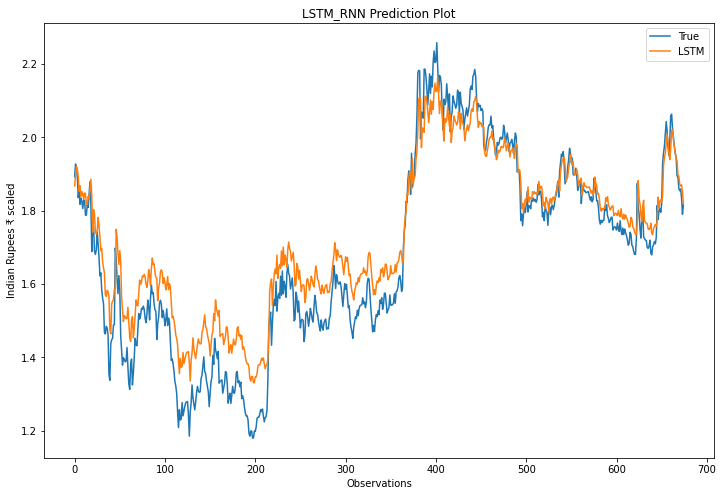

In [51]:
# Plotting for LSTM prediction :

plt.figure(figsize=(12,8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM_RNN Prediction Plot")
plt.xlabel('Observations')
plt.ylabel('Indian Rupees ₹ scaled')
plt.legend()
plt.show()



---



---



## Conclusion :
From above two predictions, we can say that ANN model performed better than the LSTM_RNN model in this task.